# Streaming prediction-error filters

Prediction-error filters (PEFs) are essential in seismic deconvolution and other geophysical estimation problems. We show that non-stationary multidimensional PEFs can be computed in a "streaming" manner, where the filter gets updated incrementally by accepting one new data point at a time. The computational cost of estimating a streaming PEF reduces to the cost of a single convolution. In other words, the cost of PEF design while filtering equals the cost of applying the filter. Moreover, the non-linear operation of finding and applying a streaming PEF is invertible at a similar cost, which enables a fast approach to missing data interpolation.

# Introduction

Prediction-error filters (PEFs) play an essential role in geophysical data analysis. They can be used directly in different forms of seismic deconvolution (Webster, 1978; Robinson & Osman, 1996). More importantly, PEFs are a practical approximation for covariance operators used in geophysical estimation problems (Claerbout, 2014). As such, they provide a way to absorb and characterize statistical patterns in a given dataset (Claerbout & Brown, 1999).

Because most natural patterns are non-stationary, extending the classic stationary formulation to non-stationarity is vital. This extension can be done either by "patching" or breaking data into overlapping windows or by a smoothly non-stationary estimation with regularization (Crawley et al., 1999; Curry, 2003). Shaping regularization provides a particularly effective method for constraining the filter variability (Fomel, 2009; Liu & Fomel, 2011; Liu et al., 2012). Both approaches have an additional computational expense, particularly in storing variable filter coefficients (Ruan et al., 2015).

This paper presents an efficient approach to computing and applying non-stationary PEFs with no excessive storage requirements. Using an adaptive-filtering approach (Widrow \& Stearns, 1985; Haykin, 2002), We show that a non-stationary PEF can be updated on the fly by accepting one data point at a time. The cost of computing and applying such a PEF reduces to the cost of a single convolution. In other words, the cost of PEF design while filtering equals the cost of applying the filter. Moreover, the non-linear operation of finding and applying a PEF has an exact inverse, which finds an immediate application in missing data interpolation problems. We extend the
filter from 1-D to multiple dimensions using the helix transform (Claerbout, 1998) and show its application to simple benchmark problems.

## Theory       

The basic equation defining a prediction-error filter is auto-regression. For a given data stream $\mathbf{d}$ and a one-dimensional PEF $\mathbf{a}$, the auto-regression equation takes the form

$$\left[\begin{array}{ccccc} d_{n+1} & d_n & d_{n-1} & \cdots &
                                                   d_{n+1-k} \end{array}\right]\,
\left[\begin{array}{l} 1 \\ a_1 \\ a_2 \\ \cdots \\ a_k \end{array}\right]
\approx 0\;,$$

where it is assumed that $n \ge k$. Equation 1 represents the convolution of the data with the prediction-error filter.

Suppose the filter gets updated with each new data point
$d_{n+1}$. The additional constraint we can impose to control
the variability of the filter is that the new filter $a$ stays close
to the previous filter $\bar{a}$.

The two conditions can be combined into one overdetermined linear system

$$\left[\begin{array}{cccc} d_n & d_{n-1} & \cdots & d_{n+1-k} \\
      \lambda & 0 & & 0 \\
      0 & \lambda & & 0 \\
    \cdots & \cdots & & \cdots \\
      0 & 0 & \cdots & \lambda
    \end{array}\right]\,
  \left[\begin{array}{l} a_1 \\ a_2 \\ \cdots \\ a_k \end{array}\right] \approx
  \left[\begin{array}{l} - d_{n+1} \\
      \lambda\,\bar{a}_1 \\
      \lambda\,\bar{a}_2 \\
     \cdots \\
      \lambda\,\bar{a}_k
    \end{array}\right]\;,$$

where $\lambda$ is the parameter that controls how much we allow 
$a$ to deviate from $\bar{a}$. In a shortened block-matrix notation, we can rewrite the linear system of equations as

$$\left[\begin{array}{c} \mathbf{d}^T \\ \lambda\,\mathbf{I} \end{array}\right]\,\mathbf{a} \approx
  \left[\begin{array}{l} - d_{n+1} \\
      \lambda\,\bar{\mathbf{a}} 
    \end{array}\right]\;,$$
    
where

$$\mathbf{d} = \left[\begin{array}{l} d_n \\ d_{n-1} \\ \cdots \\ d_{n+1-k} \end{array}\right]\;, \quad
\mathbf{a} = \left[\begin{array}{l} a_1 \\ a_2 \\ \cdots \\ a_k \end{array}\right]\;,$$

and $\mathbf{I}$ is the identity matrix. 

The least-squares solution of the overdetermined system is

$$\mathbf{a} = \left(\mathbf{d}\,\mathbf{d}^T + \lambda^2\,\mathbf{I}\right)^{-1}\,
  \left(-d_{n+1}\,\mathbf{d} + \lambda^2\,\bar{\mathbf{a}}\right)\;.$$

Next, we can use the Sherman-Morrison formula from linear algebra
(Hager, 1989) to transform the inverse matrix as follows:

$$\left(\mathbf{d}\,\mathbf{d}^T + \lambda^2\,\mathbf{I}\right)^{-1} =
  \frac{1}{\lambda^2}\,\left(\mathbf{I} - \frac{\mathbf{d}\,\mathbf{d}^T}{\lambda^2+\mathbf{d}^T\,\mathbf{d}}\right)\;.$$

Substituting the Sherman-Morrison equation and doing
algebraic simplifications lead to the final result:

$$\begin{array}{rcl}\mathbf{a} & = & \displaystyle \frac{1}{\lambda^2}\,\left(\mathbf{I} -
                   \frac{\mathbf{d}\,\mathbf{d}^T}{\lambda^2+\mathbf{d}^T\,\mathbf{d}}\right)\,\left(-d_{n+1}\,\mathbf{d}
                   + \lambda^2\,\bar{\mathbf{a}}\right) \\
& = &
\displaystyle \bar{\mathbf{a}} -
  \left(\frac{d_{n+1}+\mathbf{d}^T\,\bar{\mathbf{a}}}{\lambda^2+\mathbf{d}^T\,\mathbf{d}}\right)\,\mathbf{d}\;.\end{array}$$
  
The Sherman-Morrison technique is a well-known approach in adaptive filtering by recursive least-squares (Haykin, 2002).
  
This equation shows that the filter is updated by subtracting
a scaled version of the data. The scale is proportional to the
convolution residual computed using the previous version of the
filter. Updating the filter requires only elementary algebraic operations (vector dot products) and no iterations. Moreover, computing the dot product
$\mathbf{d}^T\,\mathbf{d}$ in a "streaming" fashion requires at most
two multiplications:

$$\mathbf{d}^T\,\mathbf{d} = \bar{\mathbf{d}}^T\,\bar{\mathbf{d}} +
d_n^2 - d_{n-k}^2\;,$$

where $k$ is number of points in $\mathbf{a}$ and $\mathbf{d}$.

### Inversion

The streaming residual $r_{n+1}$ from the left-hand side of
equation 1 can be expressed as

$$r_{n+1} = d_{n+1} + \mathbf{d}^T\,\mathbf{a}$$

or, substituting equation for $\mathbf{a}$,

$$\begin{array}{rcl}r_{n+1} & = & \displaystyle d_{n+1} + \mathbf{d}^T\,\left[\bar{\mathbf{a}} -
              \left(\frac{d_{n+1}+\mathbf{d}^T\,\bar{\mathbf{a}}}{\lambda^2+\mathbf{d}^T\,\mathbf{d}}\right)\,\mathbf{d}\right]
  \\
\nonumber
& = & \displaystyle \left(d_{n+1} +
      \mathbf{d}^T\,\bar{\mathbf{a}}\right)\,\left(1-\frac{\mathbf{d}^T\,\mathbf{d}}{\lambda^2+\mathbf{d}^T\,\mathbf{d}}\right)
  \\
& = & \displaystyle \frac{\lambda^2\,\left(d_{n+1} +
  \mathbf{d}^T\,\bar{\mathbf{a}}\right)}{\lambda^2+\mathbf{d}^T\,\mathbf{d}}\;.\end{array}$$


The equation for $r_{n+1}$ can be directly inverted to reconstruct~$d_{n+1}$ as follows:

$$d_{n+1} = r_{n+1}\,\left(1+\frac{\mathbf{d}^T\,\mathbf{d}}{\lambda^2}\right) - \mathbf{d}^T\,\bar{\mathbf{a}}\;.$$

We see that streaming time-variable deconvolution is invertible: both the input data and the time-varying filter can be reconstructed from the streaming residual. Note that because of the division by $\lambda^2$, the inverse operation may become numerically unstable for small $\lambda$.

In [165]:
import numpy as np

n1 = 400

# exponentially decaying sinusoids with different frequencies
inp = np.zeros(n1, dtype=np.float32)
for j in range((n1 // 15), n1, n1 // 5):
    wave = np.zeros(n1, dtype=np.float32)
    for x in range(j, 399+1):
        y = (x - j) / 400
        wave[x-1] = np.exp(-y * 15) * np.sin(y * 0.95 * j)
    inp += wave

res = np.copy(inp)
bak = np.copy(inp)

In [166]:
import matplotlib.pyplot as plt


In [167]:
def stems(data, label, color):
    n1 = len(data)

    # Create a plot with initial zeros
    plt.plot(np.zeros(n1), label=None, color='black')

    # Create a stem plot
    plt.stem(data, label=label, linefmt=color, markerfmt=' ', basefmt=" ")

    # Add legend and formatting
    plt.legend(loc='upper left')
    plt.xlim([0.5, n1 + 0.5])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)

    # Show the plot
    plt.show()

In [168]:
def stems(data, label, color):
    n1 = len(data)

    # Create a plot with initial zeros
    plt.plot(np.zeros(n1), label=None, color='black')

    # Create a stem plot
    # plt.stem(data, label=label, linefmt=color, markerfmt=' ', basefmt=" ", use_line_collection=True)
    plt.stem(data, label=label, linefmt=color, markerfmt=' ', basefmt=" ")

    # Add legend and formatting
    plt.legend(loc='upper left')
    plt.xlim([0.5, n1 + 0.5])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)

    # Show the plot
    plt.show()

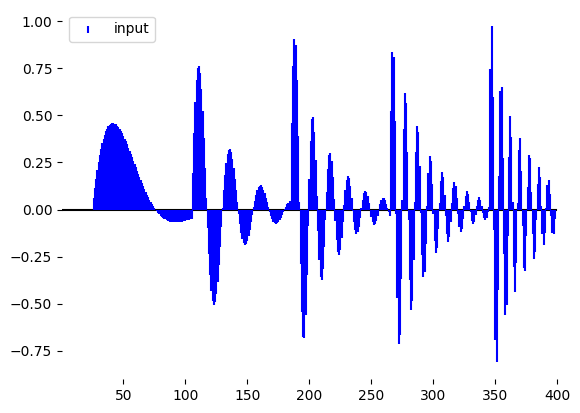

In [169]:
plot_input = stems(inp, "input", "blue")

In [170]:
def stream(inv, d, r, na, lambd):

    a = np.zeros(na,dtype=np.float32)  # streaming PEF
    dd = da = 0.0  # d (dot) d, d (dot) a

    for ia in range(na):
        if inv:
            d[ia] = r[ia]
        else:
            r[ia] = d[ia]
        dd += d[ia] * d[ia]

    rn = np.float64("0.")
    for i1 in range(na, n1):
        if inv:  # from r to d
            rn = r[i1] / lambd
            # rn = np.divide(r[i1], lambd,dtype=np.float64)
            dn = rn * (lambd + dd) - da
            d[i1] = dn
        else:  # from d to r
            dn = d[i1]
            # rn = (dn + da) / (lambd + dd)
            rn = np.divide(np.add(dn, da, dtype=np.float64), np.add(lambd, dd,dtype=np.float64),dtype=np.float64)
            r[i1] = lambd * rn

        # update PEF
        for ia in range(na):
            a[ia] -= rn * d[i1 - ia - 1]

        # update dd and da
        dd += dn * dn - d[i1 - na] * d[i1 - na]
        da = dn * a[0]
        for ia in range(1, na):
            da += a[ia] * d[i1 - ia]


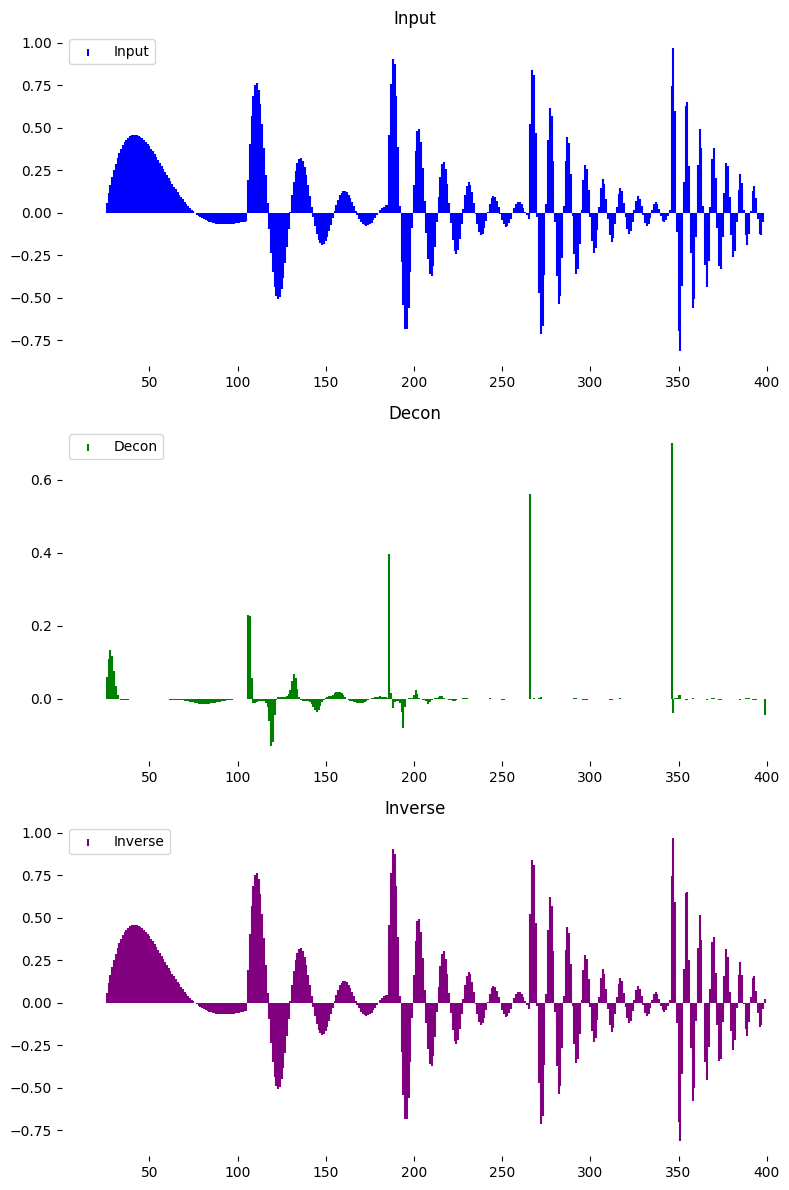

In [171]:
import matplotlib.pyplot as plt

# Create subplots with a layout of 3 rows and 1 column
fig, axs = plt.subplots(3, 1, figsize=(8, 12))  # Adjust figsize as needed

# Plot the input data
axs[0].stem(inp, linefmt='blue', markerfmt=' ', basefmt=" ")
axs[0].set_title("Input")
axs[0].set_xlim([0.5, len(inp) + 0.5])
axs[0].legend(["Input"], loc='upper left')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['left'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)

# Plot the decon data
stream(False,inp,res,2,0.1)
axs[1].stem(res, linefmt='green', markerfmt=' ', basefmt=" ")
axs[1].set_title("Decon")
axs[1].set_xlim([0.5, len(res) + 0.5])
axs[1].legend(["Decon"], loc='upper left')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)

# Plot the inverse data
stream(True,bak,res,2,0.1)
axs[2].stem(bak, linefmt='purple', markerfmt=' ', basefmt=" ")
axs[2].set_title("Inverse")
axs[2].set_xlim([0.5, len(bak) + 0.5])
axs[2].legend(["Inverse"], loc='upper left')
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)
axs[2].spines['left'].set_visible(False)
axs[2].spines['bottom'].set_visible(False)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [172]:
# plt.savefig("stream.pdf")
plt.savefig("stream.pdf", format="pdf", bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

### Multiple dimensions

In order to extend the filter from 1-D to multiple dimensions, we follow the
helix transform of Claerbout (1998). The change is minimal:
the multidimensional data is arranged in a 1D stream on a helix, and
the definition of the data vector $\mathbf{d}$ changes to

$$\mathbf{d} = \left[\begin{array}{l} d_{n+1-l_1} \\ d_{n+1-l_2} \\ \cdots \\ d_{n+1-l_k} \end{array}\right]$$

where $l_1, l_2, \ldots, l_k$ represent lags of the helical filter. The computational cost and other benefits of streaming PEFs remain the same.

One caveat is that, in multiple dimensions, we may want the
nonstationary filter to change smoothly along the helix and other dimensions. As shown below, this goal can be accomplished with only a minor change to the algorithm. Suppose that $\bar{\mathbf{a}}_1$ is the previous filter in the first (helical) dimension, and $\bar{\mathbf{a}}_2$ is the previous filter in the second dimension. We can keep the newly estimated streaming PEF close to both
filters by changing the matrix equation to

$$\left[\begin{array}{c} \mathbf{d}^T \\ \lambda_1\,\mathbf{I} \\  \lambda_2\,\mathbf{I}  \end{array}\right]\,\mathbf{a} \approx
  \left[\begin{array}{l} - d_{n+1} \\
      \lambda_1\,\bar{\mathbf{a}}_1 \\ \lambda_2\,\bar{\mathbf{a}}_2
    \end{array}\right]\;,$$

where $\lambda_1$ and $\lambda_2$ control the filter variability in the two directions. The least-squares solution of this system is

$$\mathbf{a} = \left(\mathbf{d}\,\mathbf{d}^T + \lambda^2\,\mathbf{I}\right)^{-1}\,
  \left(-d_{n+1}\,\mathbf{d} + \lambda_1^2\,\bar{\mathbf{a}}_1 +
    \lambda_1^2\,\bar{\mathbf{a}}_2 \right)\;,$$

where $\lambda^2 = \lambda_1^2+\lambda_2^2$. The new equation
is equivalent to the previous equation with the simple substitution

$$\bar{\mathbf{a}} = \displaystyle \frac{\lambda_1^2\,\bar{\mathbf{a}}_1 +
    \lambda_2^2\,\bar{\mathbf{a}}_2}{\lambda_1^2+\lambda_2^2}\;.$$

Thus, the only change in the algorithm is an increase in the storage to keep track of both $\bar{\mathbf{a}}_1$ and $\bar{\mathbf{a}}_2$. The extension to more dimensions is analogous.

### Cost comparison

Table 1 compares the computational cost of different approaches to computing prediction-error filters. The cost of streaming PEF is minimal and reduces to the cost of a single convolution. Streaming PEF can capture the input data's non-stationary character without storing multiple copies of the filter.

Moreover, all streaming computations are local, which makes them
particularly suitable for modern hardware accelerators such as
GPGPU (Sanders & Kandrot, 2010) or Intel Xeon Phi (Jeffers & Reinders, 2013).

| Method | Storage | Cost |
|:-------|:--------|:-----|
| Stationary PEF | $O(N_a)$ | $O(N_a^2\,N_d)$ |
| Non-stationary PEF | $O(N_a\,N_d)$ | $ O(N_a^2\,N_d)$ |
| Streaming PEF | $O(N_a)$ | $O(N_a\,N_d)$ |

## Missing data interpolation

The existence of the exact inversion for the application of a streaming PEF allows for a straightforward approach to missing data interpolation. When reading data in a streaming fashion, every time we meet a missing data point $d_{n+1}$, we can replace its value by a
value computed from the residual. The residual value $r_{n+1}$ in this case can be set to zero or to a random number (white noise) with the expected variance of the residual. In the latter case, it is possible to generate multiple equiprobable distributions for the interpolation
result (Clapp, 2000).

In [173]:
# Create a deepcopy of inp
inp2 = np.copy(inp)
known = np.ones(n1, dtype=bool)

# Cut holes in the data and create a mask
holes = [55, 153, 246, 301, 376]
for hole in holes:
    inp2[hole:hole + 20] = 0  # Note: Python slicing is exclusive of the end index
    known[hole:hole + 20] = False


In [174]:
def stream_missing(d, k, na, lambd):

    a = np.zeros(na)  # streaming PEF
    da = 0.0  # d (dot) a
    dd = 0.0  # d (dot) d

    for ia in range(na):
        dd += d[ia] * d[ia]

    for i1 in range(na, len(d)):
        if k[i1]:  # from d to r
            dn = d[i1]
            rn = (dn + da) / (lambd + dd)
        else:  # assume r=0
            dn = -da
            rn = 0.0
            d[i1] = dn

        # update PEF
        for ia in range(na):
            a[ia] -= rn * d[i1 - ia - 1]

        # update dd and da
        dd += dn * dn - d[i1 - na] * d[i1 - na]
        da = dn * a[0]
        for ia in range(1, na):
            da += a[ia] * d[i1 - ia]


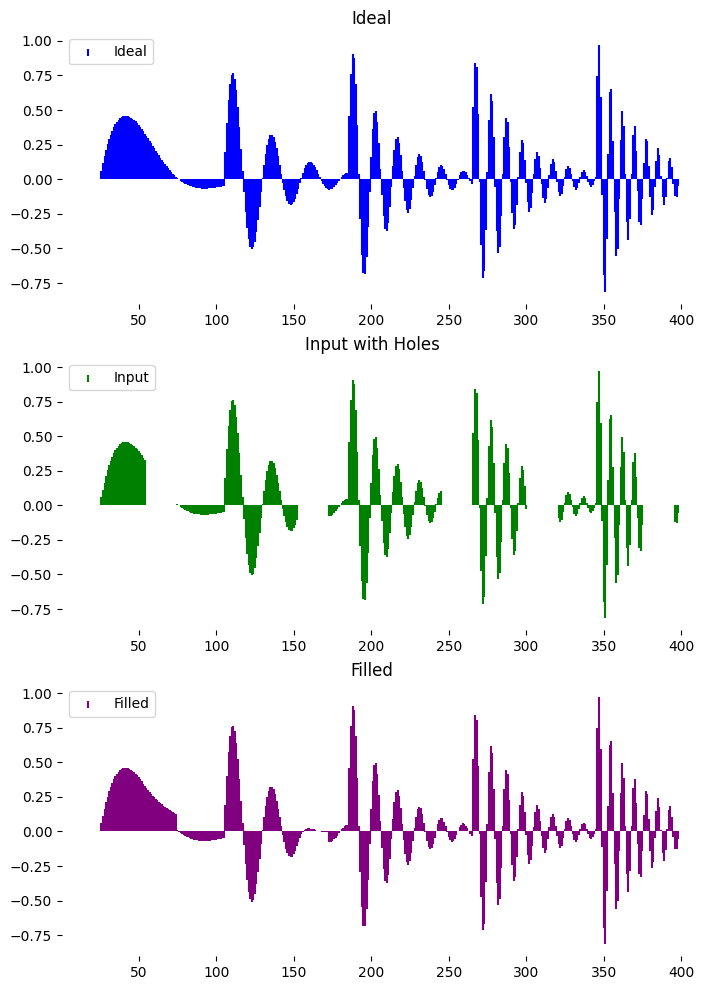

<Figure size 640x480 with 0 Axes>

In [175]:
# Create subplots with a layout of 3 rows and 1 column
fig, axs = plt.subplots(3, 1, figsize=(8, 12))  # Adjust figsize as needed

# Plot the ideal data
axs[0].stem(inp, linefmt='blue', markerfmt=' ', basefmt=" ")
axs[0].set_title("Ideal")
axs[0].set_xlim([0.5, len(inp) + 0.5])
axs[0].legend(["Ideal"], loc='upper left')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['left'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)

# Plot the input with holes
axs[1].stem(inp2, linefmt='green', markerfmt=' ', basefmt=" ")
axs[1].set_title("Input with Holes")
axs[1].set_xlim([0.5, len(inp2) + 0.5])
axs[1].legend(["Input"], loc='upper left')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)

miss = np.copy(inp2,order='F')
stream_missing(miss, known, 2, 0.05)
# Plot the interpolated data
axs[2].stem(miss, linefmt='purple', markerfmt=' ', basefmt=" ")
axs[2].set_title("Filled")
axs[2].set_xlim([0.5, len(miss) + 0.5])
axs[2].legend(["Filled"], loc='upper left')
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)
axs[2].spines['left'].set_visible(False)
axs[2].spines['bottom'].set_visible(False)

f = plt.figure()


In [176]:
#savefig

A simple 1D interpolation example using data from Figure 1 is shown in Figure 2. As evident from the figure, such interpolation, while capable of picking the non-stationary data pattern, remains one-sided and may create discontinuities at the other side of the data gap. We can rerun the streaming PEF using the opposite directions and stack the results to help with this issue.

In [177]:
import zipfile

In [178]:
import requests
import os

# Download data from a public server
url = "https://zenodo.org/api/records/11099632/files-archive"
response = requests.get(url)
with open("files.zip", "wb") as file:
    file.write(response.content)

# Unzip the archive file
with zipfile.ZipFile("files.zip", "r") as zip_ref:
    zip_ref.extractall("extracted_folder")  # Specify the directory to extract to


In [179]:
# Create a dictionary for easy access to files
patterns = {}

# Open the ZIP file and populate the dictionary
with zipfile.ZipFile("files.zip", "r") as zip_ref:
    for file_info in zip_ref.infolist():
        name = os.path.splitext(file_info.filename)[0]
        patterns[name] = file_info

In [180]:
# Create a dictionary for easy access to files
patterns = {}

# Open the ZIP file and populate the dictionary
with zipfile.ZipFile("files.zip", "r") as zip_ref:
    for file_info in zip_ref.infolist():
        name = os.path.splitext(file_info.filename)[0]
        patterns[name] = file_info.filename

# Example usage: access a specific file from the dictionary
# To read the content of a file named "wood":
with zipfile.ZipFile("files.zip", "r") as zip_ref:
    with zip_ref.open(patterns["wood"]) as file:
        # Read the file content (for example, as bytes)
        data = file.read()
        # Convert the data to an appropriate format, if necessary
        # For example, you can convert it to a numpy array if it's numerical data
        wood = np.frombuffer(data, dtype=np.float32).reshape(128, 128,order='F')

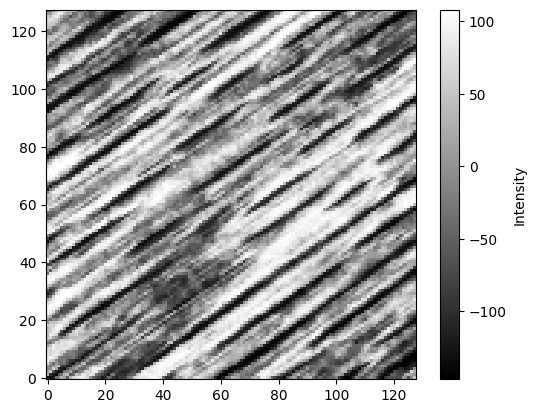

In [181]:
plt.imshow(wood, cmap='gray', interpolation='none', origin="lower")
plt.colorbar(label='Intensity')  
plt.show()

In [182]:
def punch_hole(data):

    n1, n2 = data.shape
    hole = np.zeros_like(data, dtype=np.float32, order='F')
    mask = np.zeros((n1, n2), dtype=bool, order='F')

    for i2 in range(n2):
        for i1 in range(n1):
            x = (i1) / n1 - 0.5
            y = (i2) / n2 - 0.3
            u = x + y
            v = (x - y) / 2
            if u*u + v*v < 0.15:
                hole[i1, i2] = 0.0
            else:
                hole[i1, i2] = data[i1, i2]
                mask[i1, i2] = True

    return hole, mask

# Example usage with `wood` array
whole, wmask = punch_hole(wood)


In [183]:
def helix(lag, ci):

    # Middle of the grid
    mid = (np.array(ci) // 2) -1

    # Helix index of middle
    linear_indices_ci = np.arange(ci.prod()).reshape(tuple(ci), order='F')

    hmid = linear_indices_ci[mid[0],mid[1]]

    map = lag + mid

    values = linear_indices_ci[map[:, 0], map[:, 1]] - hmid
    return values

In [184]:
from numba import njit
import numpy as np

@njit
def stream_missing_helix_core(na, d, k, hlag, λ, std, maxlag, n1):
    a = np.zeros(na, dtype=np.float32)
    da = 0.
    dd = 0.

    # Compute initial dd
    for ia in range(na):
        dd += d[maxlag - hlag[ia]] ** 2


    for i1 in range(maxlag, n1):
        if k[i1]:
            dn = d[i1]

            rn = (dn + da) / (λ + dd)

        else:  # assume r_n is random
            rn = std * np.random.randn() / λ

            # myrandom = 0.26
            # rn = std * myrandom / λ

            dn = rn * (λ + dd) - da
            d[i1] = dn

        # Update PEF
        for ia in range(na):
            if (i1 - hlag[ia]) >= 0:  # Ensure index is within bounds
                a[ia] -= rn * d[i1 - hlag[ia]]

        # Update dd and da
        if (i1 - maxlag) >= 0:  # Ensure index is within bounds
            dd += dn * dn - d[i1 - maxlag] * d[i1 - maxlag]
        da = dn * a[0]
        for ia in range(1, na):
            if (i1 + 1 - hlag[ia]) >= 0:  # Ensure index is within bounds
                da += a[ia] * d[i1 + 1 - hlag[ia]]

def stream_missing_helix(d_n_dim, k_n_dim, lag, λ, std=0, seed=1):
    "Fill missing data in multiple dimensions using streaming PEF on a helix"
    d = np.reshape(d_n_dim, -1, order='F')
    k = np.reshape(k_n_dim, -1, order='F')

    n1, na = len(d), len(lag)
    ci = np.array(d_n_dim.shape, order='F')
    hlag = helix(lag, ci)
    maxlag = np.max(hlag)
    np.random.seed(seed)

    # Call the JIT-compiled core function
    stream_missing_helix_core(na, d, k, hlag, λ, std, maxlag, n1)

In [185]:
# 11 x 11 PEF
lag = [(x, 0) for x in range(1, 6)]
for k in range(1, 11):
    lag.extend([(x, k) for x in range(-5, 6)])
lag = np.array(lag)


In [186]:
def fill_hole(forward, hole, mask, pad, noise=0, seed=1):
    "Fill holes in data using forward or backward filling"

    if forward:
        holepad = np.hstack([np.zeros((hole.shape[0], pad), dtype=np.float32, order="F"), hole])
        maskpad = np.hstack([np.zeros((mask.shape[0], pad), dtype=bool, order="F"), mask])
        stream_missing_helix(holepad, maskpad, lag, 1e6, noise, seed)
        return holepad[:, pad:]

    else:
        rhole = np.asfortranarray(np.flip(hole))
        rmask = np.asfortranarray(np.flip(mask))
        holepad = np.hstack([np.zeros((rhole.shape[0], pad), dtype=np.float32, order="F"), rhole])
        maskpad = np.hstack([np.zeros((rmask.shape[0], pad), dtype=bool, order="F"), rmask])
        stream_missing_helix(holepad, maskpad, lag, 1e6, noise, seed + 1)
        return np.asfortranarray(np.flip(holepad[:, pad:]))


In [187]:
filled1 = fill_hole(True, whole, wmask, 20)
filled2 = fill_hole(False, whole, wmask, 20)

In [188]:
def plot2(ax, data, title):
    # Display heatmap on the provided axis
    im = ax.imshow(data, cmap='gray', vmin=-137, vmax=137)
    ax.set_title(title)
    return im 

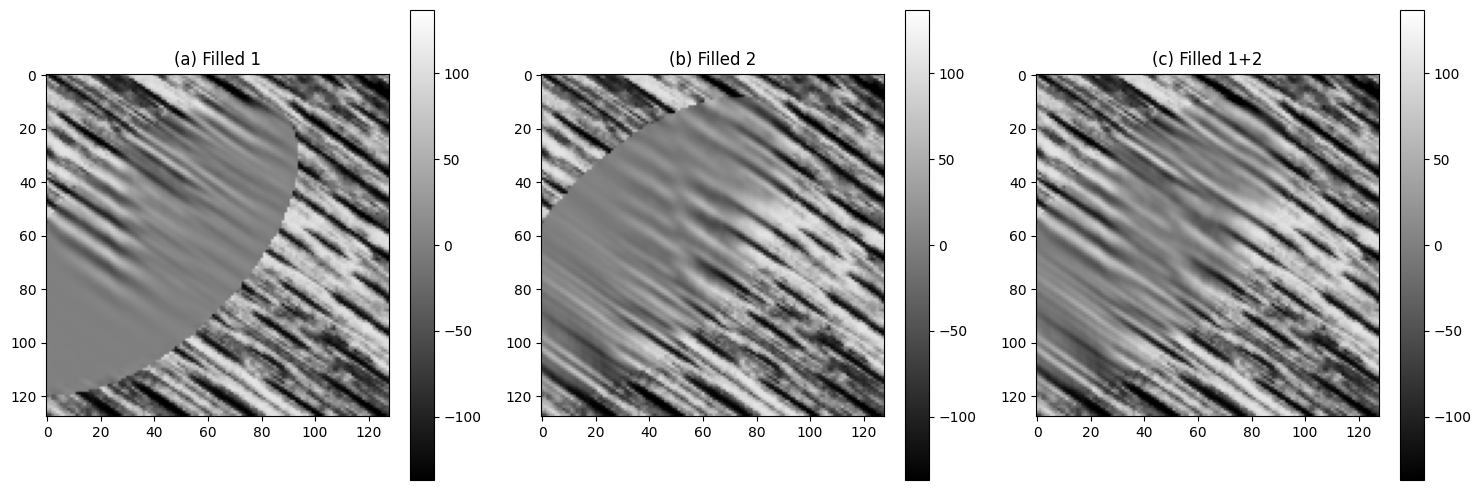

In [189]:
# Create the figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot the three images
im1 = plot2(ax1, filled1, "(a) Filled 1")
im2 = plot2(ax2, filled2, "(b) Filled 2")
im3 = plot2(ax3, filled1 + filled2 - whole, "(c) Filled 1+2")

# Add a colorbar for each subplot (optional)
fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)

# Adjust layout
plt.tight_layout()
plt.show()

In [190]:
#savefig

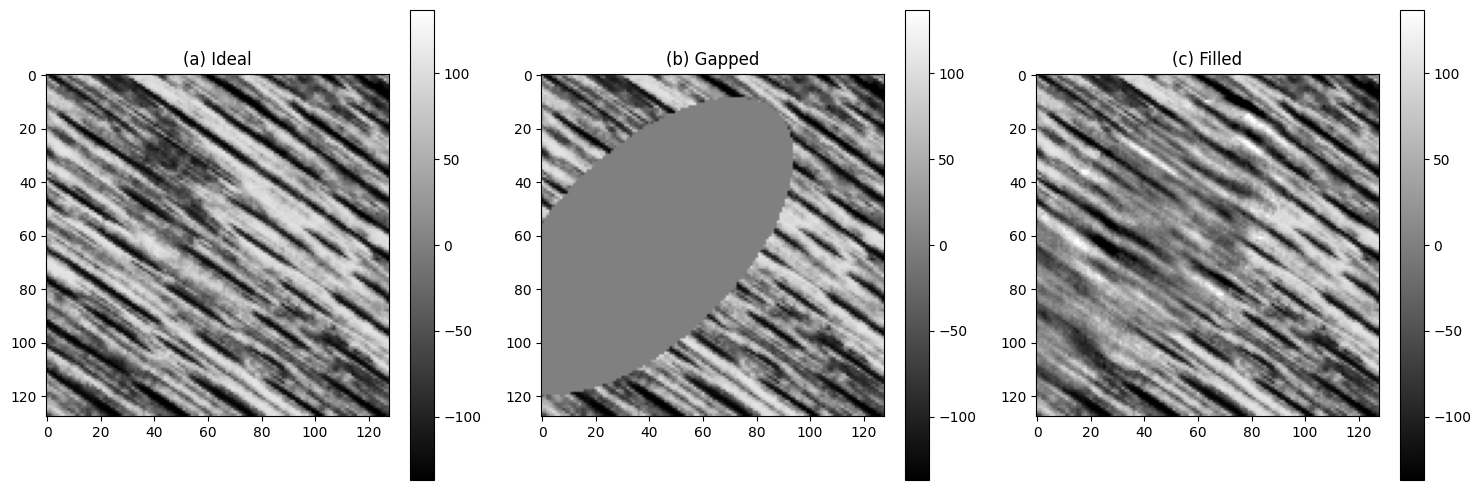

In [191]:
# Fill the hole (similar to your Julia code)
filled = fill_hole(True, whole, wmask, 20, 2) + fill_hole(False, whole, wmask, 20, 2) - whole

# Create the figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot the three images
im1 = plot2(ax1, wood, "(a) Ideal")
im2 = plot2(ax2, whole, "(b) Gapped")
im3 = plot2(ax3, filled, "(c) Filled")

# Add a colorbar for each subplot (optional)
fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)

# Adjust layout
plt.tight_layout()
plt.show()


In [192]:
#savefig

Figure 3 shows a 2D missing data interpolation test using a synthetic pattern from  Claerbout & Brown (1999). The input data for this test is shown in Figure 4b. Interpolation proceeds by running the streaming PEF twice in the forward and backward directions (Figures 3a and 3b) and averaging the interpolation results (Figure 3c.) The cost of such procedure is the cost of two convolutions, as opposed to multiple iterations required in the conventional approach to missing data interpolation with PEFs  (Naghizadeh & Sacchi, 2010; Liu & Fomel, 2011; Claerbout, 2014). A better interpolation result in Figure 4c is achieved by filling the residual inside the gap with small-variance white noise instead of zeros while reconstructing
the data from the residual. 

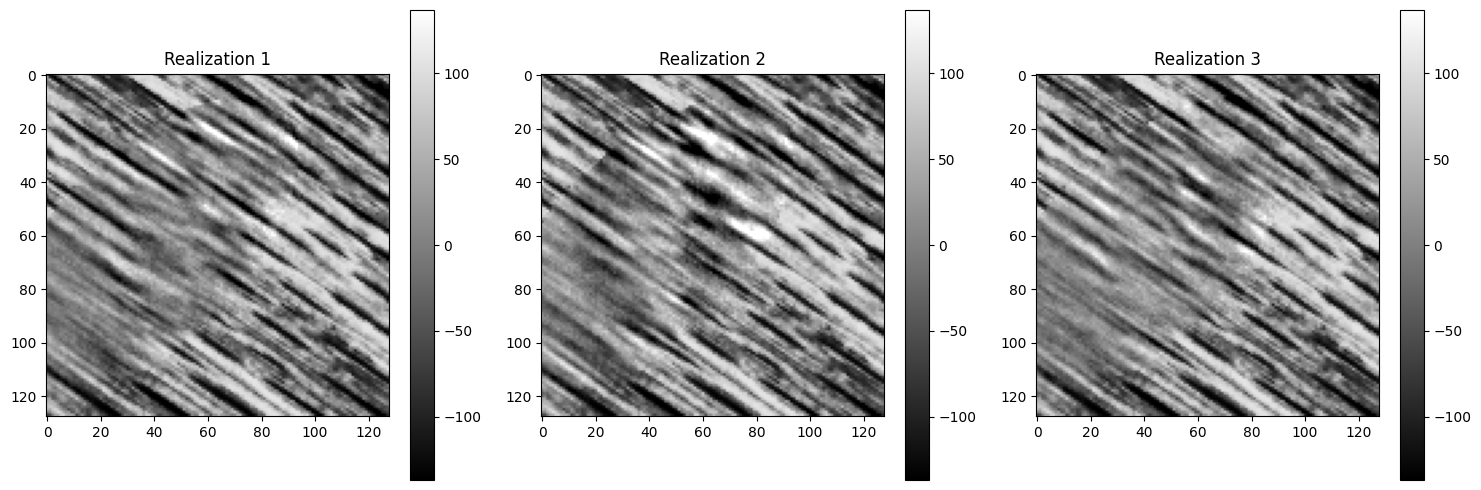

In [193]:
images = []
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for k in range(1,4):
    filled = fill_hole(True,  whole, wmask, 20, 2, k) + fill_hole(False, whole, wmask, 20, 2, k+3) - whole 
    images.append(plot2(axes[k-1], filled, f"Realization {k}"))
    fig.colorbar(images[k-1], ax=axes[k-1])

# Adjust layout
plt.tight_layout()
plt.show()

In [194]:
#savefig

The random residual approach can generate multiple equiprobable realizations for the missing data interpolation problem in the spirit of geostatistical stochastic simulations (Clapp, 2000). Figure 5 shows three realizations created using different seeds for the pseudorandom number generator. 

In [195]:

# Create a 128x128 array for the "herring" pattern
with zipfile.ZipFile("files.zip", "r") as zip_ref:
    with zip_ref.open(patterns["herr"]) as file:
        # Read the file content (for example, as bytes)
        data = file.read()
        # Convert the data to an appropriate format, if necessary
        # For example, you can convert it to a numpy array if it's numerical data
        herr = np.frombuffer(data, dtype=np.float32).reshape(128, 128, order="F")

# Make a hole in the pattern using the punch_hole function
hhole, hmask = punch_hole(herr)

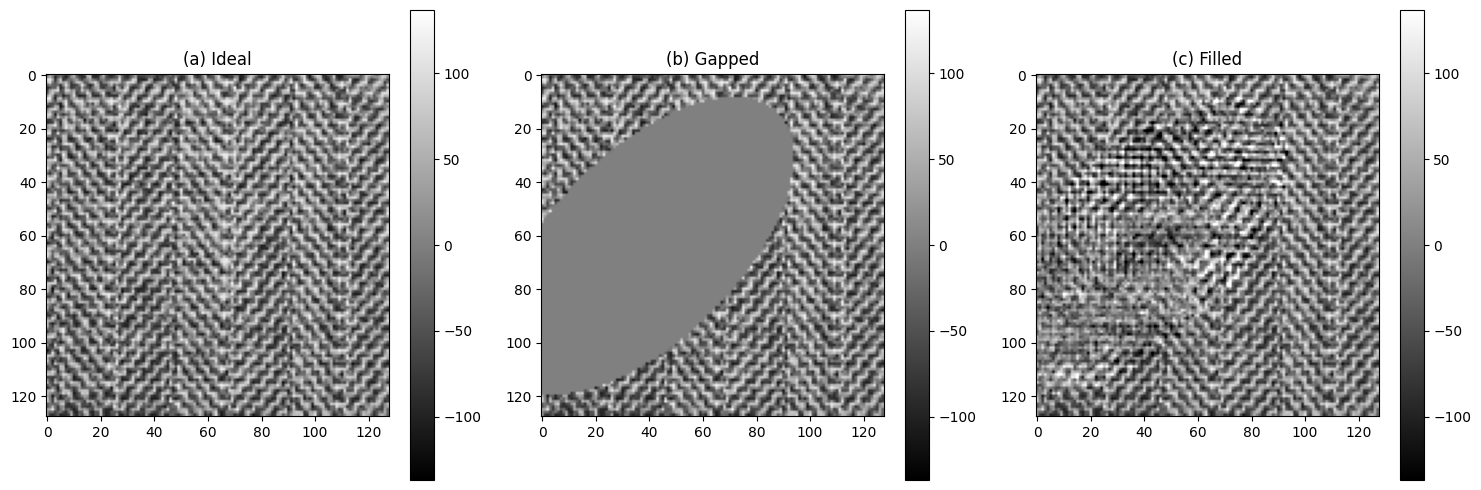

In [196]:
# Fill the hole using forward and backward filling
filled = (
    fill_hole(True, hhole, hmask, 20, 6) +
    fill_hole(False, hhole, hmask, 20, 6) - hhole
)

# Create the figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot the three images
im1 = plot2(ax1, herr, "(a) Ideal")
im2 = plot2(ax2, hhole, "(b) Gapped")
im3 = plot2(ax3, filled, "(c) Filled")

# Add a colorbar for each subplot (optional)
fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)

# Adjust layout
plt.tight_layout()
plt.show()


In [197]:
#savefig

Figure 6 shows a similar interpolation test applied to 2D data with a non-stationary pattern. Although streaming PEF fails to achieve a perfect reconstruction in this case, it manages to capture most of the pattern and hide the location of the gap.

In [198]:
# "seismic" pattern
seis_base = np.empty((250, 125), dtype=np.float32, order='F')  # single-precision array

# Read the seismic pattern data from the zip file
with zipfile.ZipFile("files.zip", "r") as zip_ref:
    with zip_ref.open(patterns["seis"]) as file:
        # Read the file content (assuming it's binary data)
        data = file.read()
        # Convert the data to a numpy array
        seis_base = np.frombuffer(data, dtype=np.float32).reshape((250, 125), order="F")

In [199]:
# Normalize the seismic pattern
seis = seis_base.copy()
seis = np.asfortranarray(seis_base.copy())
m = np.mean(seis_base)
seis -= m


In [200]:
scale = np.std(wood,ddof=1) / np.std(seis,ddof=1)
seis *= scale

# Make a hole in the seismic pattern
shole, smask = punch_hole(seis)

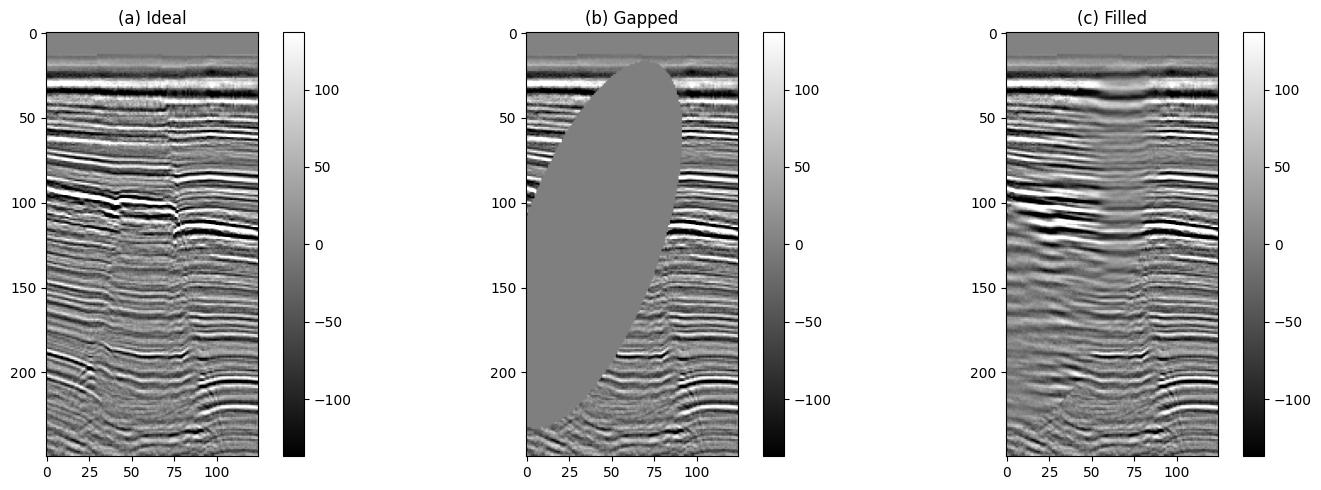

In [201]:
# Fill the hole in the seismic pattern
filled = fill_hole(True, shole, smask, 20, 0.7) + \
         fill_hole(False, shole, smask, 20, 0.7) - shole

# Create the plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot the three images
im1 = plot2(ax1, seis, "(a) Ideal")
im2 = plot2(ax2, shole, "(b) Gapped")
im3 = plot2(ax3, filled, "(c) Filled")

# Add a colorbar for each subplot (optional)
fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)

# Adjust layout
plt.tight_layout()
plt.show()


In [202]:
#savefig

Figure 7 shows a similar test applied to 2D seismic data. The pattern made by reflection events with variable slopes is well captured.

In [203]:
import numpy as np
from numba import njit

@njit
def stream_helix_core(na, inv, d, r, hlag, lambd, maxlag, n1):
    T = d.dtype
    a = np.zeros(na, dtype=T)  # streaming PEF

    # Initialize values
    for i1 in range(maxlag):
        if inv:
            d[i1] = r[i1]
        else:
            r[i1] = d[i1]

    da = 0  # d (dot) a
    dd = 0  # d (dot) d

    for ia in range(na):
        dd += d[maxlag + 1 - hlag[ia]] ** 2

    sumrn = 0
    for i1 in range(maxlag, n1):
        if inv:
            rn = r[i1] / lambd
            dn = rn * (lambd + dd) - da
            d[i1] = dn
            sumrn += rn
        else:
            dn = d[i1]
            rn = (dn + da) / (lambd + dd)
            r[i1] = lambd * rn

        # Update PEF
        for ia in range(na):
            a[ia] -= rn * d[i1 - hlag[ia]]

        # Update dd and da
        dd += dn * dn - d[i1 - maxlag] * d[i1 - maxlag]
        da = dn * a[0]

        for ia in range(1, na):
            da += a[ia] * d[i1 + 1 - hlag[ia]]

def stream_helix(inv, d_n_dim, r_n_dim, lag, lambd):
    d = np.reshape(d_n_dim, -1, order='F')
    r = np.reshape(r_n_dim, -1, order='F')

    n1, na = len(d), len(lag)
    hlag = helix(lag, np.array(d_n_dim.shape, order='F'))
    maxlag = np.max(hlag)

    # Call the JIT-compiled core function
    stream_helix_core(na, inv, d, r, hlag, lambd, maxlag, n1)

    # Reshape d and r back to their original shapes
    d_n_dim = np.reshape(d, d_n_dim.shape, order='F')
    r_n_dim = np.reshape(r, r_n_dim.shape, order='F')

In [204]:
# Apply helix filter
pad = np.hstack((np.zeros((seis.shape[0], 20), dtype=np.float32, order="F"), seis))
# res = np.empty_like(pad)
res = np.zeros_like(pad)

# Forward filtering
stream_helix(False, pad, res, lag, 1e6)  # pad -> res

# Backward filtering
stream_helix(True, pad, res, lag, 1e6)   # pad <- res

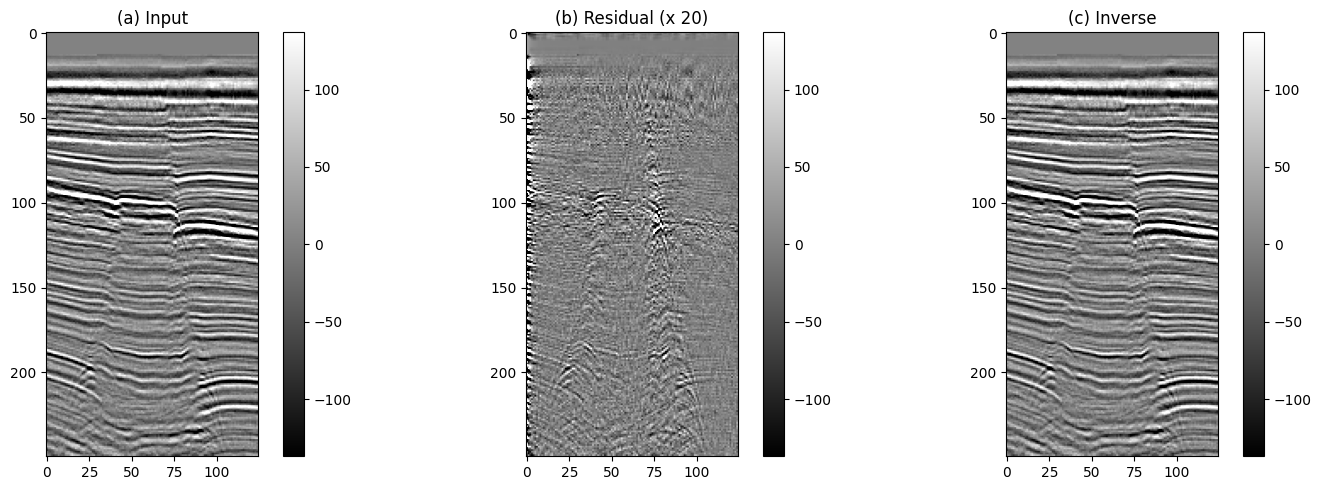

In [205]:
# Plotting the results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

im1 = plot2(ax1, seis, "(a) Input")
im2 = plot2(ax2, 20 * res[:, 20:], "(b) Residual (x 20)")
im3 = plot2(ax3, pad[:, 20:], "(c) Inverse")

# Add a colorbar for each subplot (optional)
fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)

# Adjust layout
plt.tight_layout()
plt.show()

In this case, removing dominant reflection events by PEF filtering leaves behind weaker hyperbolic diffraction events (Figure 8). 

## Discussion

A streaming application, where the adaptive filter is updated one data point at a time, is appropriate in a continuous stream of large amounts of data, such as in passive monitoring of carbon storage (Alumbaugh et al., 2024). In more typical scenarios, where the data are immediately accessible, more accurate results can be achieved with other forms of regularization, such as regularizing adaptive filter coefficients with smoothing shaping operators (Fomel, 2009; Liu \& Fomel, 2011; Liu et al., 2012). For greater efficiency, a hybrid regularization strategy can be developed. Such strategies are discussed by Geng et al. (2024), who also extend the streaming approach to other applications of seismic attributes.

In applications such as missing data reconstruction, the streaming approach represents an extreme point of the accuracy-efficiency trade-off. To achieve better accuracy, some of the efficiency can be sacrificed at the expense of performing extra iterations. The presented approach is also limited to situations of missing values in regularly sampled data and will need to be modified for situations of irregular data.

In multidimensional applications, the helical boundary conditions allow for easy invertibility (Claerbout, 1998) but are not always appropriate. In this case, extra accuracy can also be bought at the cost of sacrificing some of the efficiency.

We hope that providing reproducible benchmarks with this paper will invite other researchers to make direct comparisons with more advanced methods. Such comparisons are beyond the scope of this paper because they would require a different codebase.

## Conclusions

We have presented an efficient approach to computing and applying non-stationary prediction-error filters (PEFs). Instead of storing multiple copies of varying filters, the streaming approach stores only one copy and updates the filter on the fly with every new data point. The cost of this procedure is equivalent to the cost of a single convolution and does not require multiple iterations. Moreover, the non-linear operation of estimating and applying a streaming PEF has an exact inverse, which becomes helpful in missing data interpolation
problems. A streaming approach to missing data interpolation does not require iterations and can be accomplished effectively at the cost of two convolutions. We anticipate many possible applications of the proposed technique in geophysical estimation problems.

## References

Alumbaugh, D.L., Correa, J., Jordan, P., Petras, B., Chundur, S. and Abriel, W., 2024. An assessment of the role of geophysics in future US geologic carbon storage projects. The Leading Edge, 43, 72-83.

Bezanson, J., A. Edelman, S. Karpinski, and V. B. Shah, 2017, Julia: A fresh approach to numerical computing: SIAM Review, 59, 65-98.

Claerbout, J., 1998, Multidimensional recursive filters via a helix: Geophysics, 63, 1532–1541.

Claerbout, J., and M. Brown, 1999, Two-dimensional textures and prediction-error filters: 61st Mtg., Eur. Assn. Geosci. Eng., Session:1009.

Claerbout, J. F., 2014, Geophysical image estimation by example: Environmental soundings image enhancement: Lulu. (http://sep.stanford.edu/sep/prof/).

Clapp, R., 2000, Multiple realizations using standard inversion techniques, in SEP-105: Stanford Exploration Project, 67–78.

Crawley, S., J. Claerbout, and R. Clapp, 1999, Interpolation with smoothly non-stationary prediction-error filters: 69th Annual International Meeting, SEG, Expanded Abstracts, 1154–1157.

Curry, W., 2003, Interpolation of irregularly sampled data with nonstationary, multi- scale prediction-error filters: 73th Annual International Meeting, SEG, Expanded Abstracts, 1913–1916.

Fomel, S., 2009, Adaptive multiple subtraction using regularized nonstationary regression: Geophysics, 74, V25–V33.

Geng, Z., Fomel, S., Liu, Y., Wang, Q., Zheng, Z. and Chen, Y., 2024. Streaming seismic attributes. Geophysics, 89, A7-A10.

Granger, B.E. and F. P\'{e}rez, F., 2021, Jupyter: Thinking and storytelling with code and data: Computing in Science \& Engineering, 23, 7-14.

Hager, W. W., 1989, Updating the inverse of a matrix: SIAM Review, 31, 221–239. Jeffers, J., and J. Reinders, 2013, Intel Xeon Phi coprocessor high-performance programming: Morgan Kaufmann.

Haykin, S., 2002. Adaptive Filter Theory. Prentice-Hall.

Liu, G., X. C. J. Du, and K. Wu, 2012, Random noise attenuation using f-x regularized nonstationary autoregression: Geophysics, 77, V61–V69.

Liu, Y., and S. Fomel, 2011, Seismic data interpolation beyond aliasing using regularized nonstationary autoregression: Geophysics, 76, V69–V77.

Naghizadeh, M., and M. D. Sacchi, 2010, Robust reconstruction of aliased data using autoregressive spectral estimates: Geophysical Prospecting, 58, 1049–1062.

Robinson, E. A., and O. M. Osman, eds., 1996, Deconvolution 2: Soc. of Expl. Geophys.

Ruan, K., J. Jennings, E. Biondi, R. G. Clapp, S. A. Levin, and J. Claerbout, 2015, Industrial scale high-performance adaptive filtering with PEF applications, in SEP-160: Stanford Exploration Project, 177–188.

Sanders, J., and E. Kandrot, 2010, CUDA by example: An introduction to General- Purpose GPU programming: Addison-Wesley Professional.

Webster, G. M., ed., 1978, Deconvolution: Soc. of Expl. Geophys.

Widrow, B., and S.D. Stearns, Adaptive Signal Processing: Prentice Hall, 1985.